In [1]:
import matplotlib.pyplot as plt
%matplotlib ipympl
import numpy as np


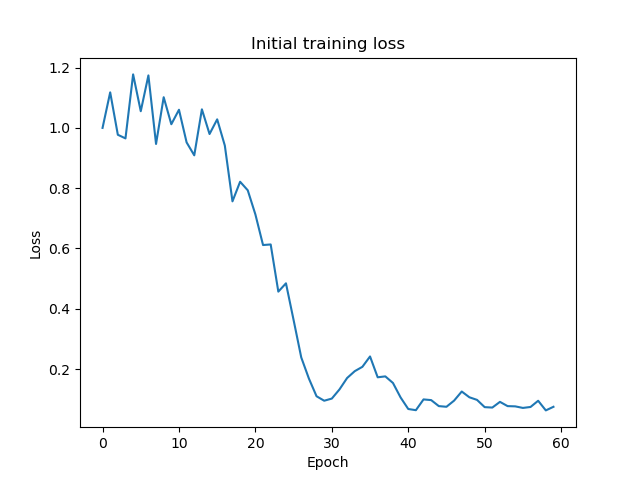

In [5]:
initial_loss = np.load('initial_train_loss.npy')
a = [initial_loss[i] / initial_loss[0] for i in range(len(initial_loss))]
plt.figure()
plt.plot(a)
plt.title('Initial training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('initial training loss.png')
plt.show()


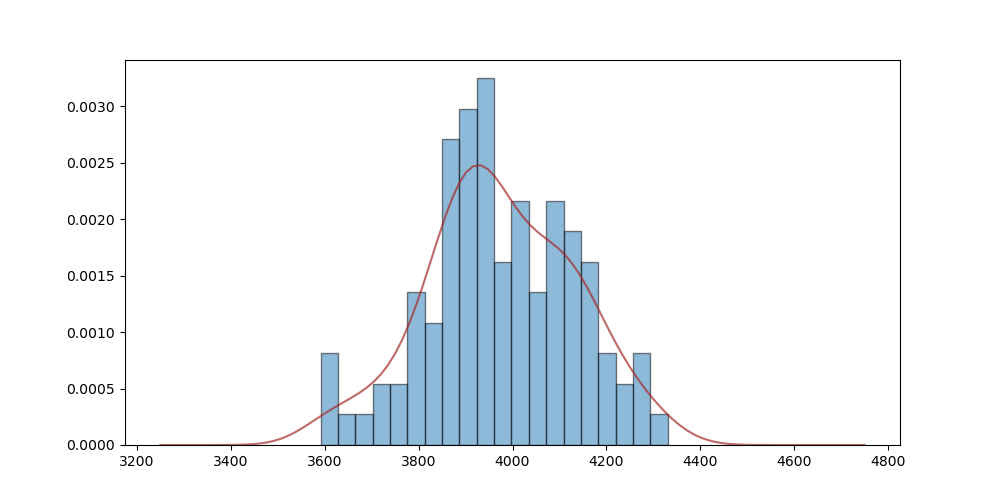

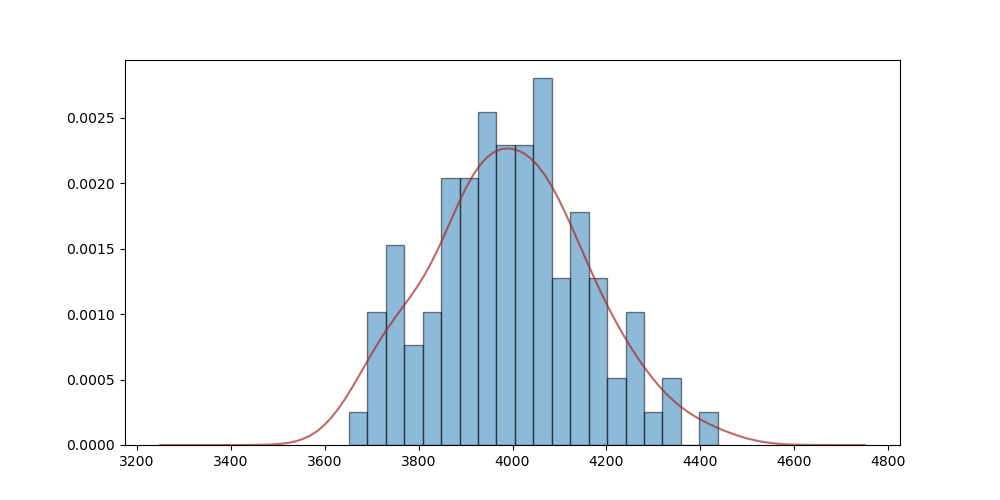

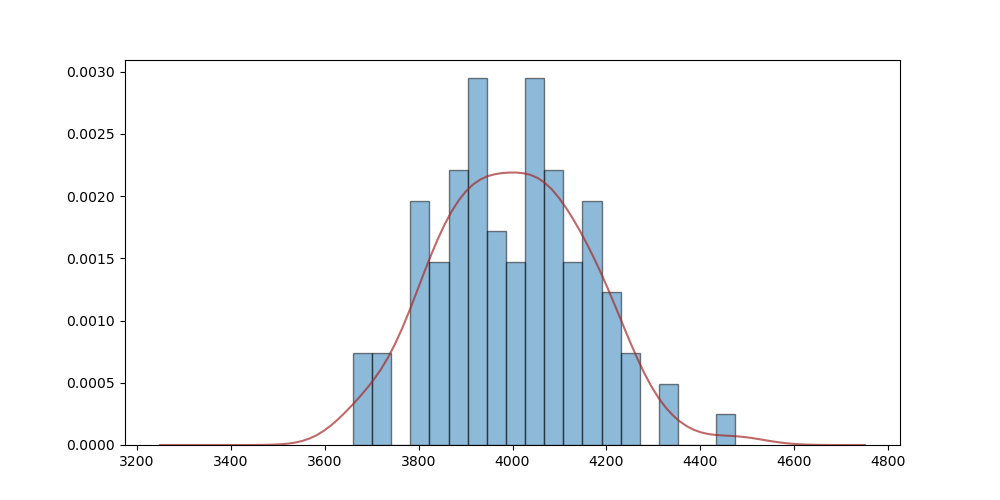

In [6]:
# import the gaussian_kde function
from scipy.stats import gaussian_kde

f = np.load('final_returns_policy_iteration.npy')
for i in range(3):
    kde = gaussian_kde(f[i])
    x = np.linspace(3250, 4750, 100)
    plt.figure(figsize=(10, 5))
    plt.hist(f[i], bins=20, density=True, label='final return distribution', edgecolor='black', alpha=0.5)
    plt.plot(x, kde(x), label='final return distribution kde {}'.format(i + 1), color='brown', alpha = 0.7)
    plt.savefig('final return distribution policy iteration {}.png'.format(i + 1))
    plt.show()

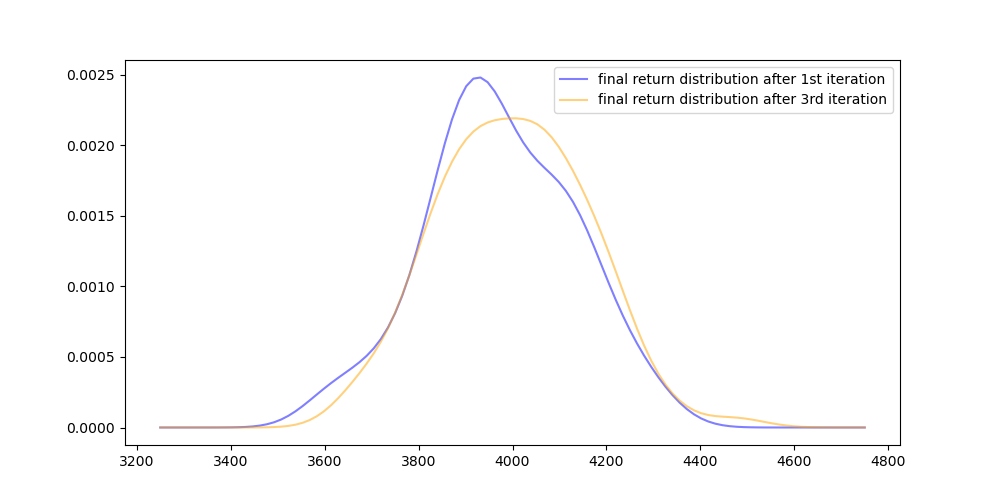

In [7]:
colors = ['blue', 'yellow', 'red', 'grey', 'orange']


plt.figure(figsize=(10, 5))

kde1 = gaussian_kde(f[0])
kde2 = gaussian_kde(f[2])
x = np.linspace(3250, 4750, 100)
plt.plot(x, kde1(x), label='final return distribution after 1st iteration', color = 'blue', alpha=0.5)
plt.plot(x, kde2(x), label='final return distribution after 3rd iteration', color = 'orange', alpha=0.5)
plt.legend()
plt.savefig('final return improvement comparison.png')
plt.show()

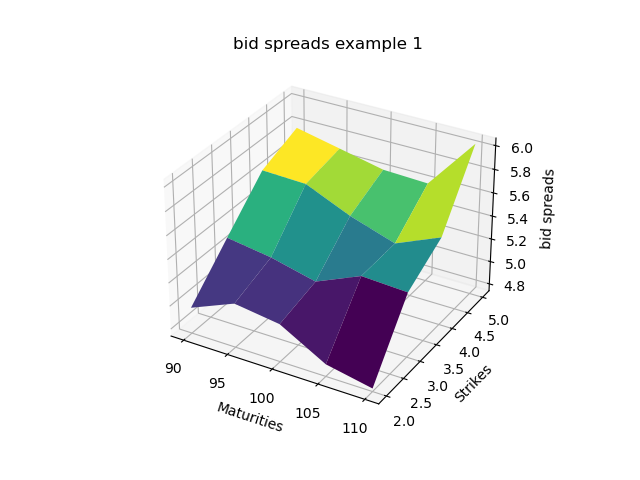

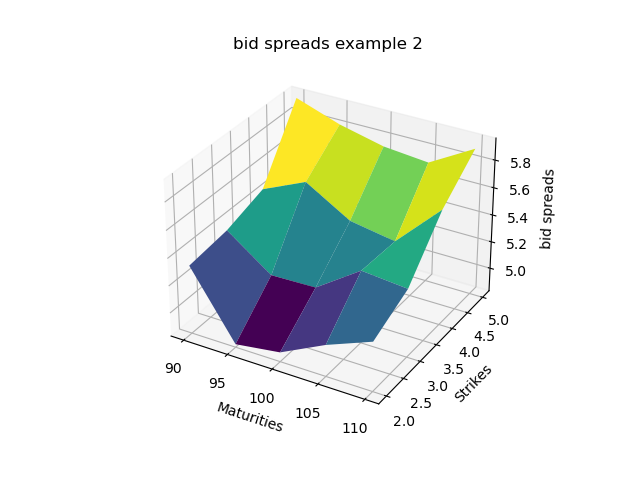

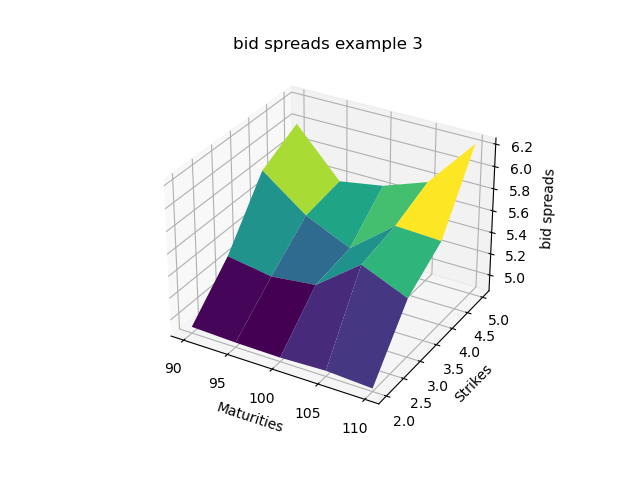

In [6]:
bid_policy_iteration = np.load('bid_matrix_policy_iteration.npy')
ask_policy_iteration = np.load('ask_matrix_policy_iteration.npy')

Maturities = [5, 4, 3, 2]
Strikes = [90, 95, 100, 105, 110]



from mpl_toolkits.mplot3d import Axes3D

for i in range(3):  
    bid = bid_policy_iteration[i]
    # transpose bid matrix
    bid = bid.T
    X, Y = np.meshgrid(Strikes, Maturities)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

# Plot the surface
    ax.plot_surface(X, Y, bid, cmap= 'viridis')

# Set labels and title
    ax.set_xlabel('Maturities')
    ax.set_ylabel('Strikes')
    ax.set_zlabel('bid spreads')
    ax.set_title('bid spreads example {}'.format(i + 1))
    plt.savefig('bid spreads example {} policy iteration.png'.format(i + 1)) 
    plt.show()


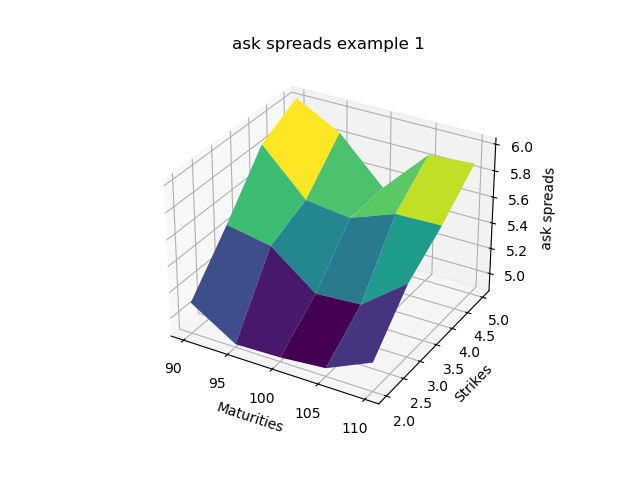

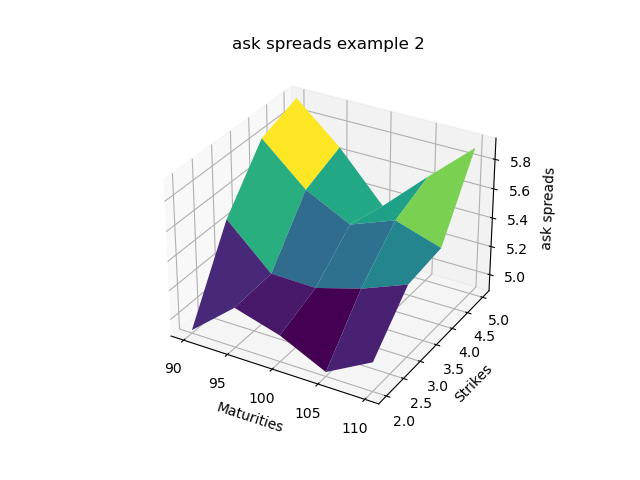

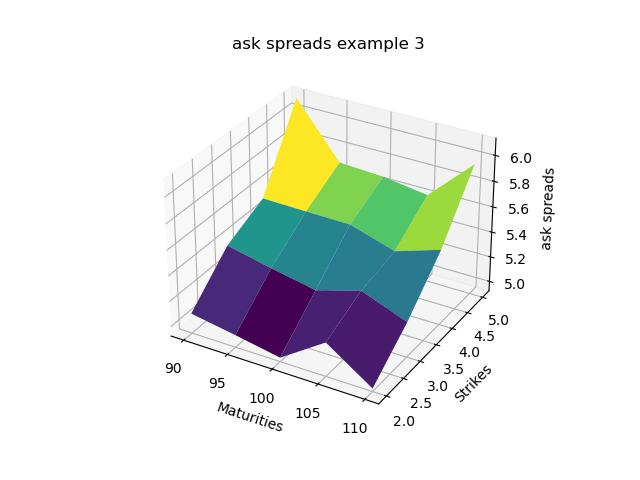

In [8]:
for i in range(3):  
    ask = ask_policy_iteration[i]
    ask = ask.T
    X, Y = np.meshgrid(Strikes, Maturities)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

# Plot the surface
    ax.plot_surface(X, Y, ask, cmap = 'viridis' )

# Set labels and title
    ax.set_xlabel('Maturities')
    ax.set_ylabel('Strikes')
    ax.set_zlabel('ask spreads')
    ax.set_title('ask spreads example {}'.format(i + 1))
    plt.savefig('ask spreads example {} policy iteration.png'.format(i + 1)) 
    plt.show()